# Archive Streaming
This notebook demonstrates:

1. how to visualize an archive (downloaded with [busdata.streambus](example_busdata.ipynb)) as a live stream; and,
2. how to infer bus operation information from the stream

with the `simulator` module in the `buskit` package.

## NOTE: For inferring, reset the route (step 2.1) before each attempt to clear existing info in objects.
(will be incorporated into functions or methods in the future)

# 1. Setup

In [1]:
import csv
import time
import dateutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2. Streaming Environment
## 2.1 Route Setup

In [2]:
# specify path to the archive AVL file
archive_path = 'MTA_data/B15-180625-235941-44650-Mon.csv'

# parse stops and set links
stops, links, stop_pos = bsim.set_route(archive_path, 1)

# create empty dictionary storage for bus objects
live_bus = {}

## 2.2 Archive Stream Visualization

In [3]:
bsim.plot_stream?

Signature: bsim.plot_stream(filename, direction, live_bus, stops, links, stop_pos, stream_time=10, rate=1)
Docstring:
visualize a streaming from an archive
stream_time: minutes to stream
rate: streams a new batch (30-sec interval) per "X" second
File:      ~/Dropbox/work_BusSimulator/buskit/buskit/simulator.py
Type:      function


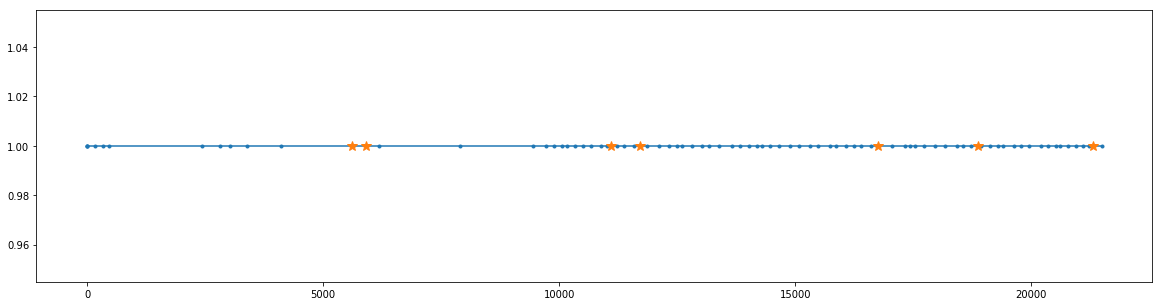

Time elapsed: 10.0 minutes


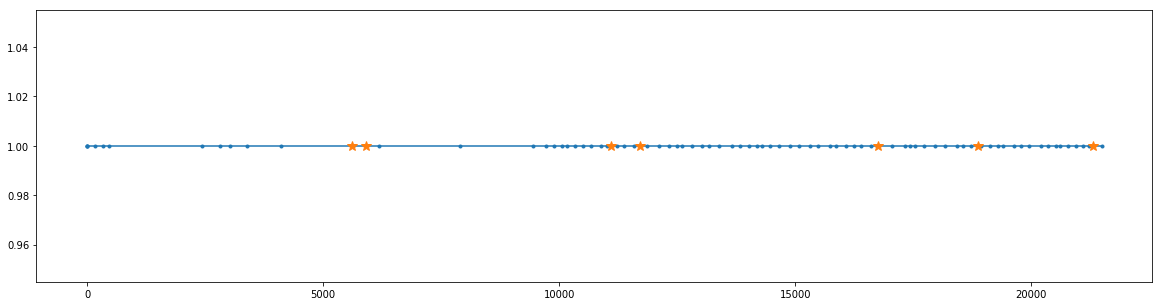

In [4]:
bsim.plot_stream(archive_path, 1, live_bus, stops, links, stop_pos)

## 2.3 Archive Stream Inferring
Trying to infer the following:
1. Link traveling speed (LTS)
2. Dwelling time (DT)

The inferred data is stored in all stop and link objects

In [5]:
bsim.infer?

Signature: bsim.infer(filename, direction, live_bus, stops, links, stop_pos, runtime=60)
Docstring:
infer link traveling speed and dwelling information from archive
runtime: run the archive stream for "X" minutes
File:      ~/Dropbox/work_BusSimulator/buskit/buskit/simulator.py
Type:      function


In [3]:
bsim.infer(archive_path, 1, live_bus, stops, links, stop_pos, runtime=90)

/Users/Yuwen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


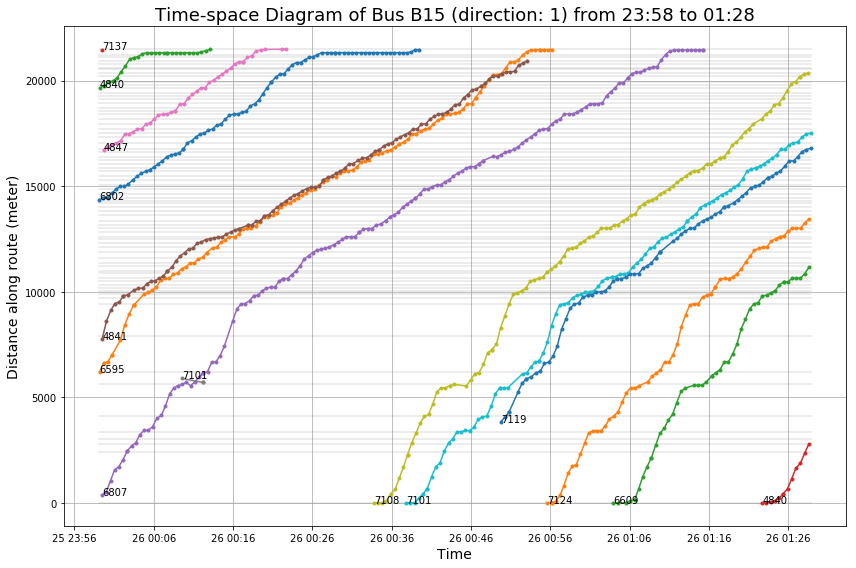

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c3cb828>)

In [4]:
# plot TSD for cross-validation
df = pd.read_csv(archive_path)
df = bdata.split_trips(df)
bdata.plot_tsd(df, 1, 0, 90)

### 2.3.1 Stop

In [5]:
# stop name
stops[37].name

'NEW LOTS AV/POWELL ST'

In [6]:
# buses that passed or stoped at the stop
stops[37].log_bus_ref

['MTA NYCT_4841',
 'MTA NYCT_6595',
 'MTA NYCT_6807',
 'MTA NYCT_7108',
 'MTA NYCT_7101']

In [7]:
# the assumed bus arrival times at the stop
stops[37].log_arr_t

[datetime.datetime(2018, 6, 26, 0, 20, 57, 411777, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(2018, 6, 26, 0, 21, 42, 552875, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(2018, 6, 26, 0, 36, 46, 414170, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(2018, 6, 26, 1, 6, 43, 187865, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(2018, 6, 26, 1, 14, 8, 690573, tzinfo=tzoffset(None, -14400))]

In [8]:
# dwell time records (5 is the default if the bus is passing by without pinging at the stop)
stops[37].log_dwell_t

[5, 5, 5, 5, 5]

In [9]:
# headways OR max pax waiting time between each bus
stops[37].log_wait_t

[0,
 datetime.timedelta(0, 45, 141098),
 datetime.timedelta(0, 903, 861295),
 datetime.timedelta(0, 1796, 773695),
 datetime.timedelta(0, 445, 502708)]

### 2.3.2 Link

In [10]:
# the calculated average traveling speed
# for each pair of consecutive ping that covers this link
links[37].log_speed

[4.659687499999961,
 8.809062500000039,
 4.662187499999959,
 5.5625,
 3.450937500000009]